<a href="https://colab.research.google.com/github/rounak393/imageprocessing/blob/main/Fastdepth1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.0 MB/s eta 0:00:00
📤 Upload an RGB image to estimate depth:


Saving input.jpg to input (1).jpg


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

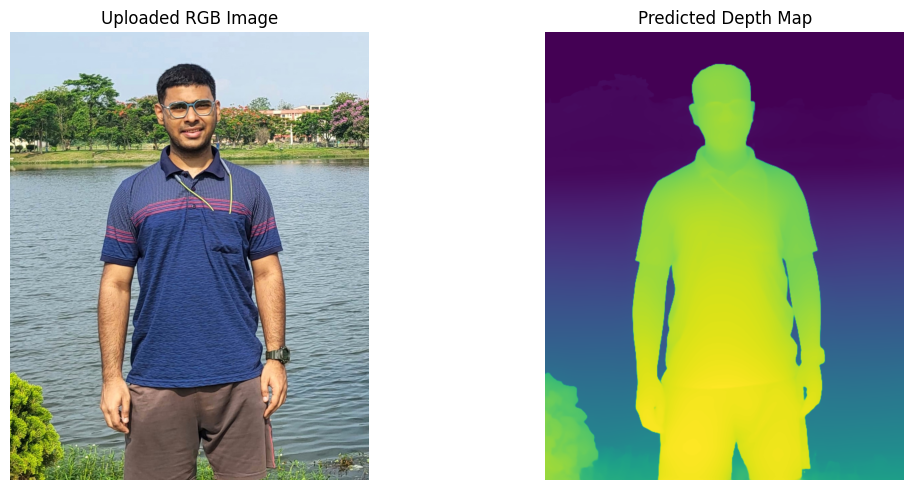

In [ ]:
# Install necessary libraries
!pip install transformers accelerate --quiet

# Ask the user to upload an image
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import torch
import numpy as np

print("📤 Upload an RGB image to estimate depth:")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
image = Image.open(img_path).convert("RGB")

# Load the Depth Anything (small version) model and processor
from transformers import AutoImageProcessor, AutoModelForDepthEstimation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = AutoImageProcessor.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf")
model = AutoModelForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-Small-hf").to(device)
model.eval()

# Preprocess the uploaded image
inputs = processor(images=image, return_tensors="pt").to(device)

# Run the model
with torch.no_grad():
    output = model(**inputs)
    depth = output.predicted_depth.squeeze().cpu()

# Resize the depth map to match the input image size
depth_resized = TF.resize(depth.unsqueeze(0), image.size[::-1]).squeeze(0).numpy()

# Normalize the depth map for visualization
depth_min = depth_resized.min()
depth_max = depth_resized.max()
depth_normalized = (depth_resized - depth_min) / (depth_max - depth_min)

# Show the original image and the depth map
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Uploaded RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(depth_normalized, cmap="viridis")
plt.title("Predicted Depth Map")
plt.axis("off")

plt.tight_layout()
plt.show()